# Predicting Diabetes with Logistic Regression

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. [Link to Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diabetes = pd.read_csv('inputs/diabetes.csv')
print(df_diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age: Age (years)
Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

## Data Description

In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Dataset Preparation 

The data set consists of record of 768 patients in total. To train our model we will be using 705 records. We will be using 20% records for testing, and the last 10% records to cross check our model.

In [4]:
X0= df_diabetes.loc[:,  df_diabetes.columns != 'Outcome']
y= df_diabetes[['Outcome']]

In [5]:
from sklearn.preprocessing import StandardScaler 

# Get column names first
names = X0.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
X = scaler.fit_transform(X0)
X = pd.DataFrame(X, columns=names)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.3)

In [7]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
610,-0.250952,-0.466156,-0.780919,0.029077,0.679007,-0.138669,-0.543248,-0.786286
536,-1.141852,-0.497453,1.080200,-1.288212,-0.692891,-0.303664,-0.830159,1.085644
94,-0.547919,0.660541,0.666618,-0.159107,-0.137185,-0.925569,0.873188,-1.041549
237,-1.141852,1.818535,1.080200,0.405445,-0.692891,1.536665,0.646679,-0.871374
195,0.342981,1.161295,0.770014,1.283638,1.130518,0.940144,-0.232176,-0.360847


In [8]:
np.mean(X_train, axis=0) # check that new means equal 0

Pregnancies                -0.024771
Glucose                     0.002310
BloodPressure               0.024392
SkinThickness              -0.000476
Insulin                     0.029843
BMI                        -0.001587
DiabetesPedigreeFunction   -0.024215
Age                         0.006599
dtype: float64

In [9]:
np.std(X_train, axis=0) # check that new stds equal 1

Pregnancies                 0.991945
Glucose                     1.006130
BloodPressure               0.938816
SkinThickness               1.009842
Insulin                     1.051668
BMI                         1.015513
DiabetesPedigreeFunction    0.959798
Age                         1.022482
dtype: float64

In [10]:
X_test.to_json('inputs/X_test_data.json', orient="split")
y_test.to_json('inputs/y_test_data.json', orient="split")

In [11]:
X_validate.to_json('inputs/X_validation_data.json', orient="split")
y_validate.to_json('inputs/y_validation_data.json', orient="split")

## Training and Evaluating Machine Learning Model

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',random_state=0).fit(X_train, np.ravel(y_train))

### Interpreting the ML Model

Text(0.5, 0, 'Importance')

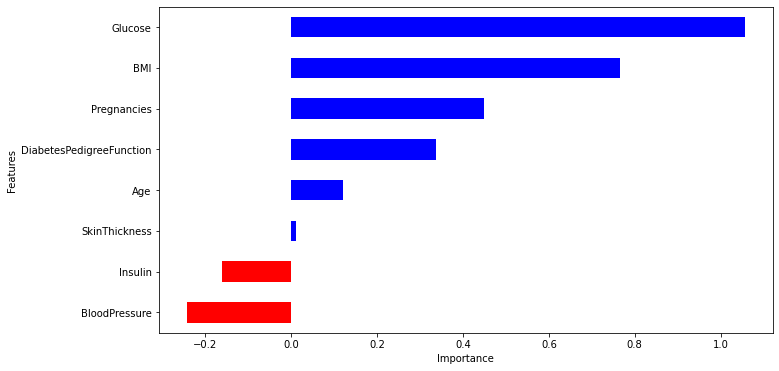

In [13]:
import matplotlib.pyplot as plt

coeff = list(clf.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

### Saving the Model

In [14]:
import joblib
joblib.dump(clf, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [15]:
model = joblib.load('diabetes_model.pkl')
acc = model.score(X_test, y_test)
print("accuracy = ",acc * 100,"%")

accuracy =  83.22981366459628 %


## Making Predictions with the model

In [16]:
print(X_validate.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
287    -0.844885 -0.059293       0.873409       1.158182  1.217347  1.727044   
387     1.233880 -0.497453       1.597178       0.969998 -0.692891  1.435129   
109    -1.141852 -0.810425       0.821712       0.279989 -0.380306  0.686306   
174    -0.547919 -1.436368      -0.263941       0.217261 -0.215331 -0.290972   
572    -0.250952 -0.309671      -0.574128       0.656358 -0.310843 -0.316356   

     DiabetesPedigreeFunction       Age  
287                  1.015133 -0.360847  
387                 -0.703314  1.000557  
109                 -0.679153 -0.786286  
174                 -0.307679 -0.020496  
572                 -0.126471 -0.956462  


In [17]:
import json

with open('inputs/X_validation_data.json') as f:
    raw_data = json.load(f)

data = raw_data['data']
data = np.array(data)
result = model.predict(data)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0])

In [18]:
predictionProbability = model.predict_proba(X_validate)
print('Probability:', predictionProbability)

Probability: [[0.50918802 0.49081198]
 [0.51920364 0.48079636]
 [0.89285697 0.10714303]
 [0.94320972 0.05679028]
 [0.81178557 0.18821443]
 [0.86933876 0.13066124]
 [0.72877275 0.27122725]
 [0.66187421 0.33812579]
 [0.33713916 0.66286084]
 [0.87619465 0.12380535]
 [0.6344463  0.3655537 ]
 [0.80101155 0.19898845]
 [0.87501137 0.12498863]
 [0.63593537 0.36406463]
 [0.94494705 0.05505295]
 [0.34190882 0.65809118]
 [0.3695037  0.6304963 ]
 [0.15499473 0.84500527]
 [0.70618309 0.29381691]
 [0.07815895 0.92184105]
 [0.92172605 0.07827395]
 [0.83260098 0.16739902]
 [0.71656341 0.28343659]
 [0.2692931  0.7307069 ]
 [0.91551732 0.08448268]
 [0.65482686 0.34517314]
 [0.73181771 0.26818229]
 [0.51297972 0.48702028]
 [0.85922008 0.14077992]
 [0.23331273 0.76668727]
 [0.85578397 0.14421603]
 [0.24278877 0.75721123]
 [0.82777361 0.17222639]
 [0.75744618 0.24255382]
 [0.90036405 0.09963595]
 [0.79825601 0.20174399]
 [0.31201777 0.68798223]
 [0.14644199 0.85355801]
 [0.96672785 0.03327215]
 [0.06711921

In [19]:
# predict
prediction = model.predict(X_validate)
print('prediction:', prediction)

prediction: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [20]:
%%writefile train.py

import os
import joblib
import argparse

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print('Libraries Imported')

parser = argparse.ArgumentParser()
parser.add_argument('--data-folder', type=str, dest='data_folder', help='data folder mounting point')
parser.add_argument('--penalty', type=str, dest='penalty', default='l2', help='penalty')
args = parser.parse_args()

data_folder = args.data_folder
penalty = args.penalty

print('Data folder:', data_folder)

filepath = os.path.join(data_folder, 'diabetes.csv')

df_diabetes = pd.read_csv(filepath)
#Features data
X0= df_diabetes.loc[:,  df_diabetes.columns != 'Outcome']
#label data
y= df_diabetes[['Outcome']]

# Scaler the data 
names = X0.columns
scaler = StandardScaler()
X = scaler.fit_transform(X0)
X = pd.DataFrame(X, columns=names)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.3)

# Adjuting model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty=penalty,random_state=0)
clf.fit(X_train, np.ravel(y_train))
print('Regressionn Model Trained.')

# Predict using the test data...
print('Running the test dataset through...')
y_predtest = clf.predict(X_test)
print('Test dataset scored.')

# calculate accuracy on the prediction
acc= clf.score(X_test, y_test)
print("accuracy = ",acc * 100,"%")

# note file saved in the outputs folder is automatically uploaded into experiment record
os.makedirs('outputs', exist_ok=True)
joblib.dump(value=clf, filename='outputs/diabetes_model.pkl')
X_validate.to_json('outputs/validation_data.json', orient="split")


Overwriting train.py


In [21]:
!python train.py --data-folder='inputs'

Libraries Imported
Data folder: inputs
Regressionn Model Trained.
Running the test dataset through...
Test dataset scored.
accuracy =  75.15527950310559 %
